In [67]:
#Importing needed libraries
import pandas as pd                                                            # used to provide major datastructure pd.DataFrame() to store the datasets
import numpy as np                                                             # used for numerical calculations and fast array manipulations
import folium                                                                  # used for spatial data visualizations
import json                                                                    # used for loading json data correctly
import statsmodels.api as sm                                                   # used to run multivariate linear regression
from scipy.stats import pearsonr, spearmanr                                    # used to run 'pearson' and 'spearman' association tests of numerical variables on two variables
from statsmodels.stats.multitest import multipletests                          # used to run multiple tests of p-values for multiple variables
import matplotlib.pyplot as plt
from IPython.display import Markdown, display                                  # used to print stuff with markdown/HTML formatting for bold text and colored text
def printmd(string):
    display(Markdown(string))

Exercise 1

In [68]:
dataS = pd.read_csv("../../Data/raw/weather/weather.csv")
#Loading the data as a pandas dataframe

In [69]:
# Print the number of rows and columns
row, cols = dataS.shape

print("Number of Rows: " + str(row))
print("Number of Columns: " + str(cols))

Number of Rows: 20220
Number of Columns: 9


In [70]:
# make a sanity check: are there missing values anywhere in the weather data?
print(dataS.isnull().any())
print("\n""There are no missing values in the dataset!" if not dataS.isnull().any().any() 
        else "There are missing values in the dataset")

date                       False
iso3166-2                  False
RelativeHumiditySurface    False
SolarRadiation             False
Surfacepressure            False
TemperatureAboveGround     False
Totalprecipitation         False
UVIndex                    False
WindSpeed                  False
dtype: bool

There are no missing values in the dataset!


In [71]:
#Making a dataset that only contains weatherdata from Sweden
is_SE = dataS[dataS['iso3166-2'].str.startswith('SE')]
is_SE

,date,iso3166-2,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
33,2020-02-13,SE-AB,77.031734,3.628275e+06,2.389095e+06,273.121578,0.000000,0.000000,3.675591
34,2020-02-13,SE-AC,93.144776,1.134221e+06,2.268189e+06,261.928398,0.000194,0.000000,1.294817
35,2020-02-13,SE-BD,84.985182,5.838355e+05,2.250394e+06,259.535712,0.000112,0.000000,1.603159
36,2020-02-13,SE-C,80.092733,3.148763e+06,2.386330e+06,272.107564,0.000000,0.000000,2.669467
37,2020-02-13,SE-D,70.096824,3.900326e+06,2.387066e+06,273.599179,0.000000,0.000000,3.631942
...,...,...,...,...,...,...,...,...,...
20215,2021-02-21,SE-U,91.916597,7.916121e+05,2.410170e+06,277.071493,0.001779,1.422222,2.021353
20216,2021-02-21,SE-W,96.715902,1.615278e+05,2.317050e+06,275.081778,0.001388,0.003466,2.420327
20217,2021-02-21,SE-X,95.125765,7.512086e+04,2.371164e+06,274.254015,0.002848,0.000305,1.859193
20218,2021-02-21,SE-Y,88.577506,8.054834e+02,2.363886e+06,267.815215,0.003638,0.000000,2.610603


In [72]:
#Making a dataset grouped by region aggregated by min, mean, median and max
weather_by_region = is_SE.groupby(by="iso3166-2").agg(["min","mean","median","max"])
weather_by_region

RelativeHumiditySurface                                   \
                              min       mean     median        max   
iso3166-2                                                            
SE-AB                   39.410229  75.910101  77.280867  95.023513   
SE-AC                   42.585501  78.216663  81.371690  96.592772   
SE-BD                   41.991591  77.262723  79.185091  95.184399   
SE-C                    38.809735  76.989613  78.474291  97.938265   
SE-D                    37.431395  74.323793  76.799461  95.906846   
SE-E                    39.911999  76.854712  79.415853  97.705464   
SE-F                    46.557000  80.455360  85.031777  97.903380   
SE-G                    46.824843  81.905038  86.022204  98.676339   
SE-H                    42.851696  78.170101  80.728837  97.472317   
SE-I                    52.655296  78.725360  79.615808  96.584367   
SE-K                    44.289753  82.219007  84.376209  99.034642   
SE-M                    48.730009  80.633475  82.545845  98.067428   
SE-N                    41.967296  80.128751  83.210694  98.169948   
SE-O                    41.361744  79.992546  83.242961  96.555378   
SE-S                    42.181908  78.439757  81.458914  98.862696   
SE-T                    39.399896  76.601666  79.924310  98.035802   
SE-U                    39.329434  74.343357  76.363532  96.727901   
SE-W                    44.186675  77.268481  79.174796  97.750631   
SE-X                    44.176019  75.201249  76.857503  96.598283   
SE-Y                    45.849611  75.247854  78.254946  93.678474   
SE-Z                    44.597154  77.561005  78.842224  93.545285   

          SolarRadiation                                            \
                     min          mean        median           max   
iso3166-2                                                            
SE-AB           8.319526  6.519777e+06  3.967966e+06  2.368242e+07   
SE-AC           0.000000  4.929333e+06  2.357825e+06  2.417619e+07   
SE-BD           0.000000  4.524733e+06  2.122648e+06  2.409091e+07   
SE-C           51.547156  6.053919e+06  3.573338e+06  2.402227e+07   
SE-D           28.589443  6.160114e+06  3.900326e+06  2.392488e+07   
SE-E           10.671783  6.159617e+06  3.763174e+06  2.415558e+07   
SE-F            7.346293  5.551192e+06  3.110389e+06  2.410689e+07   
SE-G            2.584941  5.616109e+06  3.376643e+06  2.341911e+07   
SE-H           96.269051  6.352330e+06  4.428176e+06  2.361168e+07   
SE-I           31.677179  7.464124e+06  4.634942e+06  2.366624e+07   
SE-K            5.381234  6.364544e+06  4.283049e+06  2.340541e+07   
SE-M            8.919559  6.347110e+06  4.089808e+06  2.316810e+07   
SE-N            0.000000  6.204038e+06  3.865685e+06  2.383701e+07   
SE-O            0.000000  6.292932e+06  3.947011e+06  2.445790e+07   
SE-S            0.000000  5.941929e+06  3.560111e+06  2.448088e+07   
SE-T            1.258007  5.958356e+06  3.357262e+06  2.391869e+07   
SE-U            4.349537  5.771367e+06  3.395908e+06  2.406644e+07   
SE-W            3.720999  5.426685e+06  3.148851e+06  2.417488e+07   
SE-X            1.771169  5.816213e+06  3.410742e+06  2.408611e+07   
SE-Y            0.117738  5.530657e+06  3.141081e+06  2.442981e+07   
SE-Z           15.725097  5.030042e+06  3.179384e+06  2.488890e+07   

          Surfacepressure                ... Totalprecipitation            \
                      min          mean  ...             median       max   
iso3166-2                                ...                                
SE-AB        2.349054e+06  2.421079e+06  ...           0.000580  0.020286   
SE-AC        2.214267e+06  2.307283e+06  ...           0.001102  0.023496   
SE-BD        2.192500e+06  2.290666e+06  ...           0.001328  0.023883   
SE-C         2.346217e+06  2.419016e+06  ...           0.000444  0.017486   
SE-D         2.343975e+06  2.416720e+06  ...           0.000461  0.022578   
SE-E         2.325859e+06  2.399

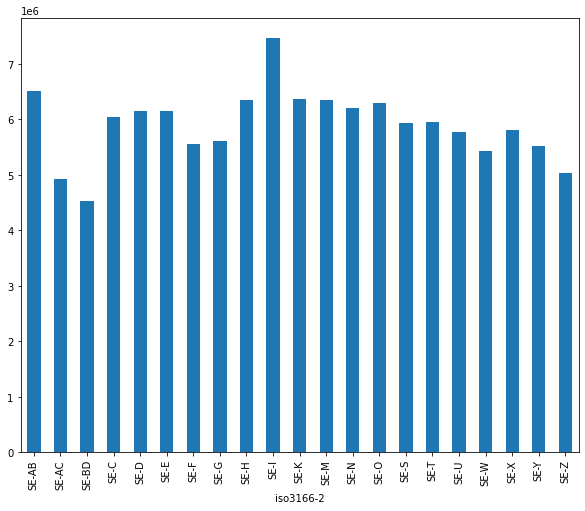

In [73]:
#Plotting the mean SolarRadiation by region as a barplot
weather_by_region["SolarRadiation"]["mean"].plot.bar(figsize=(10,8));


In [74]:
#Making a dataset that is grouped by date and aggregated only by the mean values
date_agg = is_SE.groupby(by="date").agg(["mean"])
date_agg

,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
,mean,mean,mean,mean,mean,mean,mean
date,,,,,,,
2020-02-13,79.376483,2.720269e+06,2.348926e+06,271.636942,0.000139,0.542179,3.078321
2020-02-14,86.305529,2.579899e+06,2.380921e+06,270.578150,0.000178,1.017052,1.759337
2020-02-15,90.118857,2.447283e+05,2.367395e+06,274.914790,0.003996,0.000000,4.340476
2020-02-16,89.414056,5.291831e+04,2.316129e+06,278.313147,0.012170,0.024671,6.988218
2020-02-17,79.847808,1.947812e+06,2.315949e+06,277.118934,0.001329,0.571819,7.293111
...,...,...,...,...,...,...,...
2021-02-17,82.651070,4.439312e+05,2.392564e+06,267.623439,0.003027,0.075094,3.691824
2021-02-18,82.836300,6.853106e+05,2.391579e+06,268.806915,0.000549,0.132831,3.510442


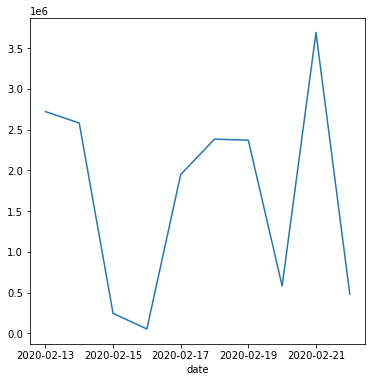

In [75]:
#Plotting the mean SolarRadiation by date as a lineplot
date_agg["SolarRadiation"]["mean"][:10].plot.line(figsize=(6,6));

Exercise 2

In [76]:
#Initialize a folium map centered on your country of study
geo_json_path='../../data/raw/shapefiles/se.geojson'
corona_df=pd.read_csv('../../data/raw/corona/se_corona.csv',sep='\t')
with open('../../data/raw/metadata/se_metadata.json','r', encoding="utf8") as f:
    country_metadata=json.load(f)
a=folium.Map(location=[63,14],zoom_start=4.13,crs='EPSG3857', 
    zoom_control=False, scrollWheelZoom=False,dragging=False)

#Adding the geodata and a layercontrol to the map
folium.GeoJson(geo_json_path, name = "geojson").add_to(a)
folium.LayerControl().add_to(a)
a

In [77]:
#Defining the region map as dictionary that converts the "full name" of the regions to their respective iso code
region_map = {country_metadata["country_metadata"][i]["covid_region_code"]: 
    country_metadata["country_metadata"][i]["iso3166-2_code"] for i in range(len(country_metadata["country_metadata"]))}

#Creating a corona dataframe
corona_df["region"] = corona_df["region_code"].map(region_map)
corona_df

#Creating a corona dataframe and grouping by region
corona_df_by_region = corona_df.groupby(by = "region" ) ["confirmed_addition"].sum().reset_index()

#Defining a population map as a dictionary to convert the "full name" of the region to their iso code
population_map = {country_metadata["country_metadata"][i]["iso3166-2_code"]: 
    country_metadata["country_metadata"][i]["population"] for i in range(len(country_metadata["country_metadata"]))}

#Adding the population to the corona by region dataframe
corona_df_by_region["population"] = corona_df_by_region["region"].map(population_map)

corona_df_by_region

,region,confirmed_addition,population
0,SE-AB,149331,2377081
1,SE-AC,13205,271736
2,SE-BD,11640,250093
3,SE-C,23408,383713
4,SE-D,12638,297540
5,SE-E,21988,465495
6,SE-F,25319,363599
7,SE-G,13547,201469
8,SE-H,10801,245446
9,SE-I,2664,59686


In [78]:
#Creating a new folium map that is to be used to show confirmed corona cases
a_cases = folium.Map(location=[63,14],zoom_start=4.13,crs='EPSG3857',
    zoom_control=False, scrollWheelZoom=False,dragging=False)

#Adding the choropleth to the a_cases map
folium.Choropleth(
    geo_data = geo_json_path,
    name = "cases",
    data = corona_df_by_region,
    columns = ["region", "confirmed_addition"],
    key_on = "properties.iso_3166_2",
    fill_color ="OrRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Confirmed cases"
).add_to(a_cases)

a_cases

In [79]:
#Creating a new folium map that is to be used to show population
a_pop = folium.Map(location=[63,14],zoom_start=4.23,crs='EPSG3857', 
    zoom_control=False, scrollWheelZoom=False,dragging=False)

#Adding the choropleth to the a_pop map
folium.Choropleth(
    geo_data = geo_json_path,
    name = "population",
    data = corona_df_by_region,
    columns = ["region", "population"],
    key_on = "properties.iso_3166_2",
    fill_color ="YlGn",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Population"
).add_to(a_pop)

a_pop


In [80]:
#Adding a column that contains the confirmed corona cases divided by the population of that region
corona_df_by_region["confirmed_pc"] = corona_df_by_region["confirmed_addition"] / corona_df_by_region["population"]

#Creating a new folium map that is to be used to show population
a_cases_pc = folium.Map(location = [63,14], zoom_start = 4.13, crs = 'EPSG3857',
    zoom_control = False, scrollWheelZoom = False , dragging = False)

#Adding the choropleth to the a_pop map
folium.Choropleth(
    geo_data = geo_json_path,
    name = "population",
    data = corona_df_by_region,
    columns = ["region", "confirmed_pc"],
    key_on = "properties.iso_3166_2",
    fill_color ="OrRd",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "Confirmed cases per capita"
).add_to(a_cases_pc)

a_cases_pc

Exercise 3

In [81]:
corona_df=pd.read_csv('../../data/raw/corona/se_corona.csv',sep='\t')
with open('../../data/raw/metadata/se_metadata.json','r', encoding="utf8") as f:
    country_metadata=json.load(f)

region_map = {country_metadata["country_metadata"][i]["covid_region_code"]: 
    country_metadata["country_metadata"][i]["iso3166-2_code"] for i in range(len(country_metadata["country_metadata"]))}
corona_df["iso3166-2"] = corona_df["region_code"].map(region_map)

corona_df

,date,region_code,confirmed_addition,iso3166-2
0,2021-02-18,Blekinge,23,SE-K
1,2021-02-17,Blekinge,30,SE-K
2,2021-02-16,Blekinge,50,SE-K
3,2021-02-15,Blekinge,3,SE-K
4,2021-02-14,Blekinge,3,SE-K
...,...,...,...,...
7996,2020-02-08,Östergötland,0,SE-E
7997,2020-02-07,Östergötland,0,SE-E
7998,2020-02-06,Östergötland,0,SE-E
7999,2020-02-05,Östergötland,0,SE-E


In [82]:
merged_df = corona_df.merge(is_SE)

merged_df

,date,region_code,confirmed_addition,iso3166-2,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
0,2021-02-18,Blekinge,23,SE-K,91.958400,4.169385e+05,2.424771e+06,272.798250,0.000317,0.572565,4.132720
1,2021-02-17,Blekinge,30,SE-K,93.411977,1.077138e+04,2.414730e+06,272.359119,0.011454,0.001988,4.702286
2,2021-02-16,Blekinge,50,SE-K,84.177924,2.432986e+05,2.422795e+06,272.284577,0.000768,0.083499,2.609667
3,2021-02-15,Blekinge,3,SE-K,82.131470,2.248502e+06,2.453097e+06,268.437235,0.000055,3.000000,1.986150
4,2021-02-14,Blekinge,3,SE-K,63.394010,5.284755e+06,2.467144e+06,268.991177,0.000000,3.000000,3.567992
...,...,...,...,...,...,...,...,...,...,...,...
7807,2020-02-17,Östergötland,0,SE-E,78.950564,3.140092e+06,2.346177e+06,278.535988,0.000694,0.805748,8.579413
7808,2020-02-16,Östergötland,0,SE-E,89.385446,3.497807e+04,2.343163e+06,280.573016,0.010469,0.000000,7.294057
7809,2020-02-15,Östergötland,0,SE-E,89.326442,6.666688e+04,2.393343e+06,276.996002,0.003482,0.000000,4.671259
7810,2020-02-14,Östergötland,0,SE-E,88.093761,2.377418e+06,2.405543e+06,272.975240,0.000005,1.056413,1.717806


In [83]:
weather_lost = is_SE.shape[0]-merged_df.shape[0]
corona_lost = corona_df.shape[0]-merged_df.shape[0]
print(f"We lost {weather_lost} rows from the weather dataset.")
print(f"We lost {corona_lost} rows from the corona datset")
print(f"We lost {weather_lost+corona_lost} rows in total, because presumeably the one of the datasets does not have the same amount of dates and so some rows are dropped")


We lost 63 rows from the weather dataset.
We lost 189 rows from the corona datset
We lost 252 rows in total, because presumeably the one of the datasets does not have the same amount of dates and so some rows are dropped


In [84]:
Xs = list(merged_df.columns[6:12])

significance_threshold = 0.005

for var in Xs:
    corr, pvalue = pearsonr(merged_df["confirmed_addition"], merged_df[var])
    print(f"{var}\n{corr:.3f}\t{pvalue}\t{pvalue < significance_threshold}\n")


Surfacepressure
0.130	6.031849091286669e-31	True

TemperatureAboveGround
-0.148	1.815467252289132e-39	True

Totalprecipitation
0.016	0.15940712901941428	False

UVIndex
-0.233	4.673663032779034e-97	True

WindSpeed
0.043	0.00016318892865573652	True



In [85]:
for var in Xs:
    corr, pvalue = spearmanr(merged_df["confirmed_addition"], merged_df[var])
    print(f"{var}\n{corr:.3f}\t{pvalue}\t{pvalue < significance_threshold}\n")

Surfacepressure
0.155	2.411947739843351e-43	True

TemperatureAboveGround
-0.217	7.300739352215883e-84	True

Totalprecipitation
0.005	0.6392701606505318	False

UVIndex
-0.357	3.5946834739162764e-233	True

WindSpeed
-0.044	9.061463229959151e-05	True



In [86]:
for var in Xs:
    corr, pvalue = pearsonr(np.log(merged_df["confirmed_addition"] + 1), merged_df[var])
    print(f"{var}\n{corr:.3f}\t{pvalue}\t{pvalue < significance_threshold}\n")

Surfacepressure
0.175	8.922852859009182e-55	True

TemperatureAboveGround
-0.213	8.560860967225847e-81	True

Totalprecipitation
-0.025	0.030077619016768843	False

UVIndex
-0.245	4.3917687284446543e-107	True

WindSpeed
-0.060	1.3593867036751656e-07	True



In [87]:
significance_threshold_bonf = 0.005 / (len(Xs) * 3)

print("Linear")
for var in Xs:
    corr, pvalue = pearsonr(merged_df["confirmed_addition"], merged_df[var])
    print(f"{var}\n{corr:.3f}\t{pvalue}\t{pvalue < significance_threshold_bonf}\n")

print("Spearman")
for var in Xs:
    corr, pvalue = spearmanr(merged_df["confirmed_addition"], merged_df[var])
    print(f"{var}\n{corr:.3f}\t{pvalue}\t{pvalue < significance_threshold_bonf}\n")

print("Log")
for var in Xs:
    corr, pvalue = pearsonr(np.log(merged_df["confirmed_addition"] + 1), merged_df[var])
    print(f"{var}\n{corr:.3f}\t{pvalue}\t{pvalue < significance_threshold_bonf}\n")

Linear
Surfacepressure
0.130	6.031849091286669e-31	True

TemperatureAboveGround
-0.148	1.815467252289132e-39	True

Totalprecipitation
0.016	0.15940712901941428	False

UVIndex
-0.233	4.673663032779034e-97	True

WindSpeed
0.043	0.00016318892865573652	True

Spearman
Surfacepressure
0.155	2.411947739843351e-43	True

TemperatureAboveGround
-0.217	7.300739352215883e-84	True

Totalprecipitation
0.005	0.6392701606505318	False

UVIndex
-0.357	3.5946834739162764e-233	True

WindSpeed
-0.044	9.061463229959151e-05	True

Log
Surfacepressure
0.175	8.922852859009182e-55	True

TemperatureAboveGround
-0.213	8.560860967225847e-81	True

Totalprecipitation
-0.025	0.030077619016768843	False

UVIndex
-0.245	4.3917687284446543e-107	True

WindSpeed
-0.060	1.3593867036751656e-07	True



In [88]:
pvalues = []
tests = ("Linear", "Spearman", "Log")

for var in Xs:
    corr, pvalue = pearsonr(merged_df["confirmed_addition"], merged_df[var])
    pvalues.append(pvalue)

for var in Xs:
    corr, pvalue = spearmanr(merged_df["confirmed_addition"], merged_df[var])
    pvalues.append(pvalue)

for var in Xs:
    corr, pvalue = pearsonr(np.log(merged_df["confirmed_addition"]), merged_df[var])
    pvalues.append(pvalue)

/Users/emmajensen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/emmajensen/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3929: RuntimeWarning: invalid value encountered in subtract
  xm = x.astype(dtype) - xmean


ValueError: array must not contain infs or NaNs

In [89]:
significant, pholmcorrected, _, _ = multipletests(pvalues, alpha = 0.005, method = "holm")

for i in range(len(significant)):
    print(f"{tests[i // len(Xs)]}\t{Xs[i % len(Xs)]}\t{significant[i]}")

Linear	Surfacepressure	True
Linear	TemperatureAboveGround	True
Linear	Totalprecipitation	False
Linear	UVIndex	True
Linear	WindSpeed	True
Spearman	Surfacepressure	True
Spearman	TemperatureAboveGround	True
Spearman	Totalprecipitation	False
Spearman	UVIndex	True
Spearman	WindSpeed	True


Exercise 4

In [90]:
corona_df=pd.read_csv('../../data/raw/corona/se_corona.csv',sep='\t')

with open('../../data/raw/metadata/se_metadata.json','r', encoding="utf8") as f:
    country_metadata=json.load(f)

region_map = {country_metadata["country_metadata"][i]["covid_region_code"]: 
    country_metadata["country_metadata"][i]["iso3166-2_code"] for i in range(len(country_metadata["country_metadata"]))}
corona_df["iso3166-2"] = corona_df["region_code"].map(region_map)

population_map = {country_metadata["country_metadata"][i]["iso3166-2_code"]: 
    country_metadata["country_metadata"][i]["population"] for i in range(len(country_metadata["country_metadata"]))}

corona_df["population"] = corona_df["iso3166-2"].map(population_map)
corona_df["cases_pc"] = corona_df["confirmed_addition"] / corona_df["population"]

DataS = pd.read_csv("../../data/raw/weather/weather.csv")

DataS["TemperatureAboveGround"] = DataS["TemperatureAboveGround"] - 273.15
DataS = DataS[DataS["iso3166-2"].str.startswith("SE")]

df = corona_df.merge(DataS)

df.to_csv("de_weather+cases.csv",index=False)

df

,date,region_code,confirmed_addition,iso3166-2,population,cases_pc,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
0,2021-02-18,Blekinge,23,SE-K,159606,0.000144,91.958400,4.169385e+05,2.424771e+06,-0.351750,0.000317,0.572565,4.132720
1,2021-02-17,Blekinge,30,SE-K,159606,0.000188,93.411977,1.077138e+04,2.414730e+06,-0.790881,0.011454,0.001988,4.702286
2,2021-02-16,Blekinge,50,SE-K,159606,0.000313,84.177924,2.432986e+05,2.422795e+06,-0.865423,0.000768,0.083499,2.609667
3,2021-02-15,Blekinge,3,SE-K,159606,0.000019,82.131470,2.248502e+06,2.453097e+06,-4.712765,0.000055,3.000000,1.986150
4,2021-02-14,Blekinge,3,SE-K,159606,0.000019,63.394010,5.284755e+06,2.467144e+06,-4.158823,0.000000,3.000000,3.567992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,2020-02-17,Östergötland,0,SE-E,465495,0.000000,78.950564,3.140092e+06,2.346177e+06,5.385988,0.000694,0.805748,8.579413
7808,2020-02-16,Östergötland,0,SE-E,465495,0.000000,89.385446,3.497807e+04,2.343163e+06,7.423016,0.010469,0.000000,7.294057
7809,2020-02-15,Östergötland,0,SE-E,465495,0.000000,89.326442,6.666688e+04,2.393343e+06,3.846002,0.003482,0.000000,4.671259
7810,2020-02-14,Östergötland,0,SE-E,465495,0.000000,88.093761,2.377418e+06,2.405543e+06,-0.174760,0.000005,1.056413,1.717806


In [91]:
#Selecting the features/the collected weatherdata
Xs = ['RelativeHumiditySurface', 'SolarRadiation', 'Surfacepressure', 'TemperatureAboveGround', 
    'Totalprecipitation', 'UVIndex', 'WindSpeed']

#Adding a constant to the dataframe and the Xs list
df = sm.add_constant(df)
Xs.append("const")

In [92]:
est = sm.OLS(df["confirmed_addition"], df[Xs], hasconst = True).fit()


print(est.summary())

                            OLS Regression Results                            
Dep. Variable:     confirmed_addition   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 02 Mar 2022   Prob (F-statistic):          1.72e-171
Time:                        13:01:33   Log-Likelihood:                -52816.
No. Observations:                7812   AIC:                         1.056e+05
Df Residuals:                    7804   BIC:                         1.057e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RelativeHumiditySurface   

In [93]:
log_est = sm.OLS(np.log(df["confirmed_addition"] + 1), df[Xs], hasconst = True).fit()


print(log_est.summary())

                            OLS Regression Results                            
Dep. Variable:     confirmed_addition   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     188.5
Date:                Wed, 02 Mar 2022   Prob (F-statistic):          4.85e-259
Time:                        13:01:33   Log-Likelihood:                -15227.
No. Observations:                7812   AIC:                         3.047e+04
Df Residuals:                    7804   BIC:                         3.053e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RelativeHumiditySurface   

In [94]:
est_pc = sm.OLS(np.log(df["cases_pc"] + 1), df[Xs], hasconst = True).fit()
print(est_pc.summary())

                            OLS Regression Results                            
Dep. Variable:               cases_pc   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     277.9
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:33   Log-Likelihood:                 54631.
No. Observations:                7812   AIC:                        -1.092e+05
Df Residuals:                    7804   BIC:                        -1.092e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RelativeHumiditySurface  4

In [95]:
regions = ["const",]

for region in set(df["iso3166-2"]):
    if region != "SE-BE":
        df[region] = (df["iso3166-2"] == region).astype(int)
        regions.append(region)
        Xs.append(region)

df

,const,date,region_code,confirmed_addition,iso3166-2,population,cases_pc,RelativeHumiditySurface,SolarRadiation,Surfacepressure,...,SE-X,SE-G,SE-T,SE-AC,SE-M,SE-Y,SE-H,SE-K,SE-F,SE-AB
0,1.0,2021-02-18,Blekinge,23,SE-K,159606,0.000144,91.958400,4.169385e+05,2.424771e+06,...,0,0,0,0,0,0,0,1,0,0
1,1.0,2021-02-17,Blekinge,30,SE-K,159606,0.000188,93.411977,1.077138e+04,2.414730e+06,...,0,0,0,0,0,0,0,1,0,0
2,1.0,2021-02-16,Blekinge,50,SE-K,159606,0.000313,84.177924,2.432986e+05,2.422795e+06,...,0,0,0,0,0,0,0,1,0,0
3,1.0,2021-02-15,Blekinge,3,SE-K,159606,0.000019,82.131470,2.248502e+06,2.453097e+06,...,0,0,0,0,0,0,0,1,0,0
4,1.0,2021-02-14,Blekinge,3,SE-K,159606,0.000019,63.394010,5.284755e+06,2.467144e+06,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7807,1.0,2020-02-17,Östergötland,0,SE-E,465495,0.000000,78.950564,3.140092e+06,2.346177e+06,...,0,0,0,0,0,0,0,0,0,0
7808,1.0,2020-02-16,Östergötland,0,SE-E,465495,0.000000,89.385446,3.497807e+04,2.343163e+06,...,0,0,0,0,0,0,0,0,0,0
7809,1.0,2020-02-15,Östergötland,0,SE-E,465495,0.000000,89.326442,6.666688e+04,2.393343e+06,...,0,0,0,0,0,0,0,0,0,0
7810,1.0,2020-02-14,Östergötland,0,SE-E,465495,0.000000,88.093761,2.377418e+06,2.405543e+06,...,0,0,0,0,0,0,0,0,0,0


In [96]:
est_pc = sm.OLS(np.log(df["cases_pc"] + 1), df[regions], hasconst = True).fit()
print(est_pc.summary())

est_pc = sm.OLS(np.log(df["cases_pc"] + 1), df[Xs], hasconst = True).fit()
print(est_pc.summary())

                            OLS Regression Results                            
Dep. Variable:               cases_pc   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.091
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           1.85e-16
Time:                        13:01:33   Log-Likelihood:                 53823.
No. Observations:                7812   AIC:                        -1.076e+05
Df Residuals:                    7791   BIC:                        -1.075e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.373e+08   3.37e+08     -0.408      0.6

In [97]:
est_pc = sm.OLS(np.log(df["cases_pc"] + 1), df[Xs], hasconst = True).fit()
print(est_pc.summary())

                            OLS Regression Results                            
Dep. Variable:               cases_pc   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     79.77
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:01:33   Log-Likelihood:                 54716.
No. Observations:                7812   AIC:                        -1.094e+05
Df Residuals:                    7784   BIC:                        -1.092e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RelativeHumiditySurface  5

In [98]:
est_clust = sm.OLS(np.log(df["cases_pc"] + 1), df[Xs], hasconst = True).fit(cov_type = "cluster", cov_kwds ={"groups": df["iso3166-2"]}, use_t = True)

print(est_clust.summary())

                            OLS Regression Results                            
Dep. Variable:               cases_pc   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     1042.
Date:                Wed, 02 Mar 2022   Prob (F-statistic):           3.29e-24
Time:                        13:01:33   Log-Likelihood:                 54716.
No. Observations:                7812   AIC:                        -1.094e+05
Df Residuals:                    7784   BIC:                        -1.092e+05
Df Model:                          27                                         
Covariance Type:              cluster                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RelativeHumiditySurface  5

/Users/emmajensen/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 28, but rank is 7
  warnings.warn('covariance of constraints does not have full '


Exercise 5

First Year Project tasks:

### Loading the raw data

In [104]:
#Importing the raw corona data from Germany
corona_df = pd.read_csv('../../data/raw/corona/se_corona.csv', sep = '\t')
corona_df.name = 'corona_df'

#Importing the raw weather data for the countries, Germany, Netherlands, Sweden and Denmark
weather_df = pd.read_csv("../../data/raw/weather/weather.csv")
weather_df.name = 'weather_df'

#Loading in the metadata json using the Python json library
with open('../../data/raw/metadata/se_metadata.json','r', encoding="utf8") as f:
    country_metadata=json.load(f)

#Creating a folium map (called de_map) that is based around Germany and uneditable in terms of placement and zoom
se_map = folium.Map(location = [63, 14], zoom_start = 4.13, crs = 'EPSG3857', 
    zoom_control = False, scrollWheelZoom = False, dragging = False)

#Loading in the geojson that contains data for the regions and borders of Germany and adding it to the folium map
folium.GeoJson('../../data/raw/shapefiles/se.geojson', name = "geojson").add_to(se_map)
folium.LayerControl().add_to(se_map);

### Task 0: Data filtering and cleaning

The data analysis done in this notebook is done with a handful of different datasets:

> CSV: Corona (SE) - Contains the Number of new infections (per day) and Number of new casualties (per day) filtered by day and region in Sweden for each day in the period `2020-01-02` to `2021-02-21`.
>
> CSV: Weather - Contains information about several indicators of weather conditions for each region in Germany, Denmark, Sweden and Netherlands for each day in the period `2020-02-13` to `2021-02-21`
>
> JSON: Metadata (SE) - Contains more information on the population in the different regions in Sweden
>
> GEOJSON: Geojson (SE) - Holds the geojson data for the different regions in Sweden

### Initial inspection of the datasets

In [106]:
row, cols = weather_df.shape
print("Number of Rows: " + str(row))
print("Number of Columns: " + str(cols))
weather_df.head()

Number of Rows: 20220
Number of Columns: 9


,date,iso3166-2,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
0,2020-02-13,DE-BB,76.337444,1.824290e+06,2.403341e+06,276.551573,0.003355,2.777806,4.542822
1,2020-02-13,DE-BE,76.065297,1.786373e+06,2.408182e+06,276.844633,0.003523,4.671329,4.761509
2,2020-02-13,DE-BW,80.113988,1.505760e+06,2.290158e+06,276.227143,0.008013,4.268546,4.467024
3,2020-02-13,DE-BY,81.554346,2.363013e+06,2.275361e+06,275.583053,0.005227,4.417797,3.677414
4,2020-02-13,DE-HB,87.167414,8.389756e+03,2.406940e+06,276.237452,0.007715,1.794872,4.699573


We can see that the `weather` dataset contains `9` different variables for the countries Germany, Denmark Sweden and Netherlands spread across `20220` rows and `9` columns. Each row contains `7` different weather measurements for a particular day in a specific country and region:
> `Date` (YYYY-DD-MM): Is the day of which the weather measurements were made and reported
>
> `Iso3166-2`: Is the [ISO 3166-2](https://en.wikipedia.org/wiki/ISO_3166-2) code for the region for which the weather measurements were made
>
> `Relative Humidity Surface` (%): Is the **daily average** relative humidity of the surface
>
> `Solar Radiation`(W/m^2): Is the **daily sum** of the solar radiation from the sun
>
> `Surface Pressure` (Pa): Is the **daily sum** of the atmospheric pressure at the surface of the earth
>
> `TemperatureAboveGround` (º K): Is the **daily average** of the temperature above ground
>
> `Total Precipitation` (mm): Is the **daily sum** of the total precipitation 
>
> `UV Index` (Numerical value): Is the **daily sum** of the strength of the ultraviolet radiation
>
> `Wind Speed`(m/s): Is the **daily average** of the wind speed

In [107]:
row, cols = corona_df.shape
print("Number of Rows: " + str(row))
print("Number of Columns: " + str(cols))
corona_df.head()

Number of Rows: 8001
Number of Columns: 3


,date,region_code,confirmed_addition
0,2021-02-18,Blekinge,23
1,2021-02-17,Blekinge,30
2,2021-02-16,Blekinge,50
3,2021-02-15,Blekinge,3
4,2021-02-14,Blekinge,3


We can see that the `corona` dataset contains `3` different variables for corona reports for Germany spread across `8001` rows and `3` columns. Each row contains `1` corona reports for a particular day in a specific country and region:
> `Date` (YYYY-DD-MM): Is the day of which the corona report was made
>
> `Region Code`: Is the region code for the region for which the corona report was made
>
> `Confirmed Addition`: Is the number of new confirmed infections of corona for the specific day in the specified region

### Sanity check
Checking to see if there are any missing (Na or NaN) values in either of the two datasets \
\
We also check if there are any duplicate rows in either of the two datasets. \
\
Next we also check if any of the reported numerical values are negative. It would not make sense to e.g., have a negative UV Index or a negative comfirmed COVID-19 cases.

### Checking for NaN values:

In [108]:
datasets = [weather_df, corona_df]
for dataset in datasets:
    if dataset.name == "weather_df":
        printmd("### **Weather Dataset**")
    else: 
        printmd("### **Corona Dataset**")

    print(dataset.isnull().any())
    print("-----------------------------------------------")
    printmd( "##### <span style='color:red'> ❌ **Oh No! There are missing data values in the dataset!**</span>" if dataset.isnull().any().any() 
            else
            "##### <span style='color:lightgreen'> ✅ **Great! There are no missing data values in the dataset!**</span>")
    printmd("____")

### **Weather Dataset**

date                       False
iso3166-2                  False
RelativeHumiditySurface    False
SolarRadiation             False
Surfacepressure            False
TemperatureAboveGround     False
Totalprecipitation         False
UVIndex                    False
WindSpeed                  False
dtype: bool
-----------------------------------------------


##### <span style='color:lightgreen'> ✅ **Great! There are no missing data values in the dataset!**</span>

____

### **Corona Dataset**

date                  False
region_code           False
confirmed_addition    False
dtype: bool
-----------------------------------------------


##### <span style='color:lightgreen'> ✅ **Great! There are no missing data values in the dataset!**</span>

____

### Checking for duplicates:

In [109]:
for dataset in datasets:
    if dataset.name == "weather_df":
        printmd("### **Weather Dataset**")
    else: 
        printmd("### **Corona Dataset**")

    print(dataset.duplicated())
    print("-----------------------------------------------")
    printmd( "##### <span style='color:red'> ❌ **Oh No! There are duplicate data values in the dataset!**</span>" if dataset.duplicated().any()
            else
            "##### <span style='color:lightgreen'> ✅ **Great! There are no duplicate data values in the dataset!**</span>")
    printmd("____")

### **Weather Dataset**

0        False
1        False
2        False
3        False
4        False
         ...  
20215    False
20216    False
20217    False
20218    False
20219    False
Length: 20220, dtype: bool
-----------------------------------------------


##### <span style='color:lightgreen'> ✅ **Great! There are no duplicate data values in the dataset!**</span>

____

### **Corona Dataset**

0       False
1       False
2       False
3       False
4       False
        ...  
7996    False
7997    False
7998    False
7999    False
8000    False
Length: 8001, dtype: bool
-----------------------------------------------


##### <span style='color:lightgreen'> ✅ **Great! There are no duplicate data values in the dataset!**</span>

____

### Checking for values negative reports

In [110]:
for dataset in datasets:
    if dataset.name == "weather_df":
        printmd("### **Weather Dataset**")
    else: 
        printmd("### **Corona Dataset**")
    dataset = dataset.select_dtypes(include=np.number)

    print((dataset < 0).any())
    print("-----------------------------------------------")
    printmd( "##### <span style='color:red'> ❌ **Oh No! There are data values that shouldn't be negative in the dataset!**</span>" if (dataset < 0).any().any() 
            else
            "##### <span style='color:lightgreen'> ✅ **Great! There are no data values that shouldn't be negative in the dataset!**</span>")
    printmd("____")

### **Weather Dataset**

RelativeHumiditySurface    False
SolarRadiation             False
Surfacepressure            False
TemperatureAboveGround     False
Totalprecipitation         False
UVIndex                    False
WindSpeed                  False
dtype: bool
-----------------------------------------------


##### <span style='color:lightgreen'> ✅ **Great! There are no data values that shouldn't be negative in the dataset!**</span>

____

### **Corona Dataset**

confirmed_addition    False
dtype: bool
-----------------------------------------------


##### <span style='color:lightgreen'> ✅ **Great! There are no data values that shouldn't be negative in the dataset!**</span>

____

Since there are no missing or falsely reported data values we can move on to cleaning and filtering the data.

#### _Let's start by cleaning and filtering the corona data for Sweden:_

We first start of by creating to dictionaries that are going to help us to map both regions and their populations to the dataframes:

In [111]:
#Creating a dictionary that contains the full names of the different regions as keys and their respective iso3166-2 code as values
region_map = {country_metadata["country_metadata"][i]["covid_region_code"]: 
    country_metadata["country_metadata"][i]["iso3166-2_code"] for i in range(len(country_metadata["country_metadata"]))}

#Creating a dictionary that contains the full names of the different regions as keys and their respective populations as values
population_map = {country_metadata["country_metadata"][i]["iso3166-2_code"]: 
    country_metadata["country_metadata"][i]["population"] for i in range(len(country_metadata["country_metadata"]))}

Now with the region_map we can create extra columns to add the iso3166-2 code to the corona dataframe as it only contained to full region codes. \
\
We can also use the population_map to add a column with the population of each of the regions to the corona dataframe. \
\
With the population column we can create a column that contains the cases and deaths per capita using the confirmed addition and the population column we just created.

In [113]:
#Using the region_map dictionary to create a new column with the respective iso3166-2 code for each region based on the full region name
#from the region_code column
corona_df["iso3166-2"] = corona_df["region_code"].map(region_map)

#Using the population_map dictionary to create a new column with the respective population for each region based on the iso3166-2 code
#from the iso3166-2 column
corona_df["population"] = corona_df["iso3166-2"].map(population_map)

#Also adding a cases and deaths per capita column that is created using the confirmed covid cases and deaths respectively divided by the population in that region
corona_df["cases_pc"] = corona_df["confirmed_addition"] / corona_df["population"]

#### _Now moving on to the weather dataset:_

We start off by first filtering out all the other countries from the dataset as we are not interested in their data.\
\
We can then convert the temperature measurements from º K to º C, we do that by subtracting `273.15` from each row value in the temperature measurements

<span style='color:IndianRed'>Please note! Be careful to not run the following cell more than once as this will keep doing the subtractions which could lead to negative and or NaN temperature values</span>

In [115]:
#Filtering out all the weather data that is not relevant as we are only interested in weatherdata from Germany
weather_df = weather_df[weather_df["iso3166-2"].str.startswith("SE")]

#Converting the temperature from Kelvin to Celsius
weather_df["TemperatureAboveGround"] = weather_df["TemperatureAboveGround"] - 273.15

<ipython-input-115-df065a022142>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df["TemperatureAboveGround"] = weather_df["TemperatureAboveGround"] - 273.15


Finally we can merge the corona_df and the weather_df to create on big dataframe/dataset that contains all the data that we need.

In [116]:
#Merging the weatherdata with the coronadata to create one dataframe with all the data that we need
merged_df = corona_df.merge(weather_df, on = ["date", "iso3166-2"])
#Moving the iso3166-2 column to the second column to make the dataframe more intuitive.
col_to_move = merged_df.pop("iso3166-2")
merged_df.insert(1, "iso3166-2", col_to_move)

Now that we have merged the two datasets we want to check how many rows we lost from each of the two datasets. \
\
We do that by subtracting the number of rows from each of the two datasets by the number of rows in the merged dataset.

In [117]:
weather_lost = weather_df.shape[0]-merged_df.shape[0]
corona_lost = corona_df.shape[0]-merged_df.shape[0]
print(f"We lost {weather_lost} rows from the weather dataset.")
print(f"We lost {corona_lost} rows from the corona datset")
print(f"We lost {weather_lost+corona_lost} rows in total")

We lost 63 rows from the weather dataset.
We lost 189 rows from the corona datset
We lost 252 rows in total


As we can see we lost 252 rows from the two datasets by merging.
This could be due to the fact that the corona dataset starts from the 2nd of January \
whereas the weather dataset starts on the 13th of February and therefore some of the corona data is lost. \
It could also be possible that on the days that do match one of the datasets does not contain data on the same region as the other dataset, resulting in more dropped rows.


### Outputting and re-loading filtered and cleaned data

Now having cleaned and filtered to two datasets we can create new `.csv` files that we can use for the rest of this notebook. \
\
We do this by using the built-in pandas function `pd.to_csv` that will automatically convert the pandas dataframe to a `.csv` file \
\
We will also create shortcuts to those files so the code becomes more human readable.

In [120]:
# The pd.to_csv function is run by first specifying the file path and name that it should create.
# The index = False argument specifies to the function that the .csv file should not include the index that the pandas dataframe has
corona_df.to_csv("../../Data/processed/se_corona.csv", index = False)
weather_df.to_csv("../../Data/processed/se_weather.csv", index = False)
merged_df.to_csv("../../Data/processed/se_corona_weather.csv", index = False)

# Now creating the shortcuts to the processed datasets
corona_path = "../../Data/processed/se_corona.csv"
weather_path = "../../Data/processed/se_weather.csv"
merged_path = "../../Data/processed/se_corona_weather.csv"

We can now read in and overwrite the name variables of the datasets to make sure that the data we use has been filtered and cleaned correctly:

In [172]:
corona_df = pd.read_csv(corona_path)
weather_df = pd.read_csv(weather_path)
merged_df = pd.read_csv(merged_path)
reversed_merged_df = merged_df.iloc[::-1]

### Task 1: Single variable analysis

In [173]:
row, cols = reversed_merged_df.shape
print("Number of Rows: " + str(row))
print("Number of Columns: " + str(cols))
reversed_merged_df.head()

Number of Rows: 7812
Number of Columns: 13


,date,iso3166-2,region_code,confirmed_addition,population,cases_pc,RelativeHumiditySurface,SolarRadiation,Surfacepressure,TemperatureAboveGround,Totalprecipitation,UVIndex,WindSpeed
7811,2020-02-13,SE-E,Östergötland,0,465495,0.0,72.114807,4.095440e+06,2.372508e+06,1.054218,0.000000,0.692390,3.998767
7810,2020-02-14,SE-E,Östergötland,0,465495,0.0,88.093761,2.377418e+06,2.405543e+06,-0.174760,0.000005,1.056413,1.717806
7809,2020-02-15,SE-E,Östergötland,0,465495,0.0,89.326442,6.666688e+04,2.393343e+06,3.846002,0.003482,0.000000,4.671259
7808,2020-02-16,SE-E,Östergötland,0,465495,0.0,89.385446,3.497807e+04,2.343163e+06,7.423016,0.010469,0.000000,7.294057
7807,2020-02-17,SE-E,Östergötland,0,465495,0.0,78.950564,3.140092e+06,2.346177e+06,5.385988,0.000694,0.805748,8.579413


In [174]:
reversed_merged_df.set_index('date', inplace=True)

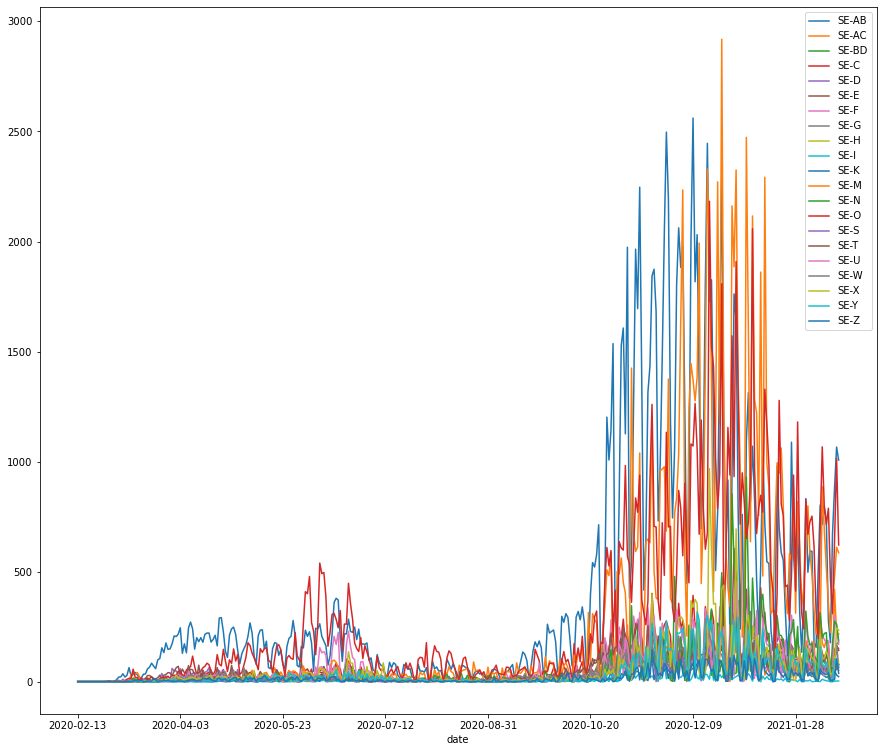

In [176]:
reversed_merged_df.groupby('iso3166-2')['confirmed_addition'].plot(kind="line",legend=True, figsize=(15,13))
plt.show()


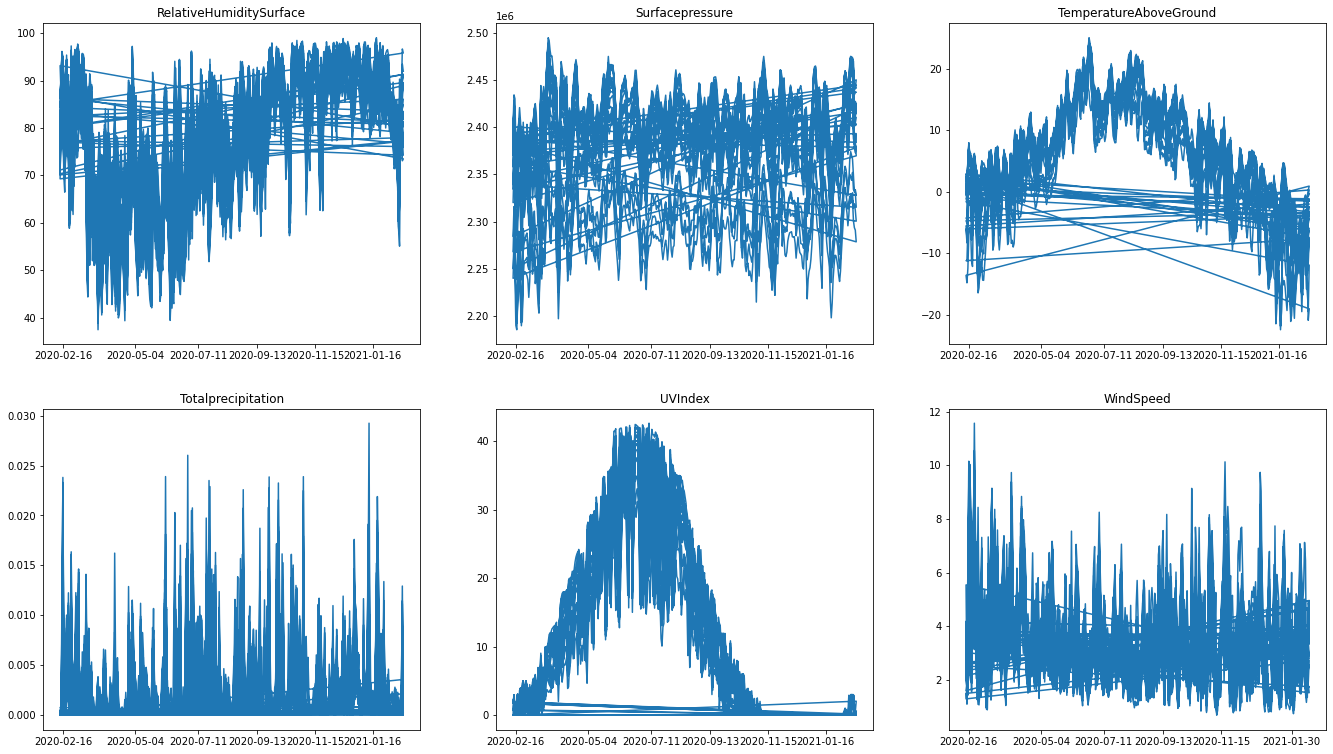

In [177]:
#weatherdata
fig, ax = plt.subplots(2,3,figsize=(23,13))

ax[0][0].plot(reversed_merged_df['RelativeHumiditySurface'])
ax[0, 0].set_title('RelativeHumiditySurface')
ax[0,0].set_xticks(['2020-02-16','2020-05-04','2020-07-11','2020-09-13','2020-11-15','2021-01-16'])
ax[0][1].plot(reversed_merged_df['Surfacepressure'])
ax[0, 1].set_title('Surfacepressure')
ax[0,1].set_xticks(['2020-02-16','2020-05-04','2020-07-11','2020-09-13','2020-11-15','2021-01-16'])
ax[0][2].plot(reversed_merged_df['TemperatureAboveGround'])
ax[0, 2].set_title('TemperatureAboveGround')
ax[0,2].set_xticks(['2020-02-16','2020-05-04','2020-07-11','2020-09-13','2020-11-15','2021-01-16'])
ax[1][0].plot(reversed_merged_df['Totalprecipitation'])
ax[1, 0].set_title('Totalprecipitation')
ax[1,0].set_xticks(['2020-02-16','2020-05-04','2020-07-11','2020-09-13','2020-11-15','2021-01-16'])
ax[1][1].plot(reversed_merged_df['UVIndex'])
ax[1, 1].set_title('UVIndex')
ax[1,1].set_xticks(['2020-02-16','2020-05-04','2020-07-11','2020-09-13','2020-11-15','2021-01-16'])
ax[1][2].plot(reversed_merged_df['WindSpeed'])
ax[1, 2].set_title('WindSpeed')
ax[1,2].set_xticks(['2020-02-16','2020-05-04','2020-07-11','2020-09-13','2020-11-15','2021-01-30']);
#plt.xticks()


### Task 2: Associations

While researching whether there is a significant statistical association in Germany between weather data and infection rates, the most important variables that we took in consideration were:

> `R-squared` (%): analyzes how much the changes in the independent variable can explain the changes in the dependent variable
>
> `Adj. R-squared` (%): is R-squared, but modified for the number of variables
>
> `coef`: measures how change in one variable affect the independent variable; if negative, our variables will have an inverse relationship, meaning that if one increases the other decreases
>
> `t`: measurement of the precision with which the coefficient is measured
>
> `p > |t|`: p value, based on the t statistic, shows how likey is our coefficient measured through our model

In [178]:
# Variables from the collected weather data
Xs = ['RelativeHumiditySurface', 'SolarRadiation', 'Surfacepressure', 'TemperatureAboveGround', 
    'Totalprecipitation', 'UVIndex', 'WindSpeed']

# Adding a constant term to both our dataframe and the Xs list
reversed_merged_df = sm.add_constant(reversed_merged_df)
Xs.append('const')

# Performing the ordinary least squares regession to fit the regression line to our data
est = sm.OLS(reversed_merged_df['confirmed_addition'], reversed_merged_df[Xs], hasconst=True).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     confirmed_addition   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     122.5
Date:                Wed, 02 Mar 2022   Prob (F-statistic):          1.72e-171
Time:                        15:29:24   Log-Likelihood:                -52816.
No. Observations:                7812   AIC:                         1.056e+05
Df Residuals:                    7804   BIC:                         1.057e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
RelativeHumiditySurface     2.6316      0.334      7.878      0.000       1.977       3.286
SolarRadiation           6.714e-07   1.04e-06      0.644      0.519   -1.37e-06    2.71e-06
Surfacepressure             0.0008   5.07e-05     16.613      0.000       0.001       0.001
TemperatureAboveGround     -1.5599      0.487     -3.205      0.001      -2.514      -0.606
Totalprecipitation       -679.3419    889.165     -0.764      0.445   -2422.344    1063.660
UVIndex                    -2.3682      0.499     -4.750      0.000      -3.345      -1.391
WindSpeed                   6.1670      1.803      3.420      0.001       2.633       9.701
const                   -2111.4509    122.548    -17.230      0.000   -2351.678   -1871.224
==============================================================================
Omnibus:                     8792.177   Durbin-Watson:                   0.407
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           738621.672
Skew:                           5.909   Prob(JB):                         0.00
Kurtosis:                      49.147   Cond. No.                     3.30e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

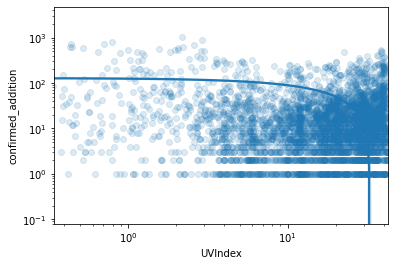

In [129]:
import seaborn as sns

pp = sns.regplot(x="UVIndex", y="confirmed_addition", 
                    data=merged_df,
                    scatter_kws={'alpha':0.15},
                    fit_reg=True)
pp.set(xscale="log", yscale="log");

Our variables can be used to say something about “confirmed addition” with 99%. R-squared gives us this.

We have a signficance threshold of 0.005. We use this to determine wether the variables have a significant association with our dependent value, confirmed addition. If the variables have a P-value less than this (0.005) we cannot deny that there could be a correlation. Out of our 8 independent? Variables, Totalprecipation and Solar radiation are excluded, since their P-values are above 0.005. 

Looking at UV-index to compare with Germany.

#We don’t comment on on the adjusted R-squared since we do not have enough variables for this to be relevant. 

#The plot is grouped by date

^This part might need to be rephrased.